# Image Compression by K-means clustering

In this exercise, you have to perform an image compression of the given picture of New York (New York.jpeg).

To do so, we want to keep not all the possible colors, but only 4.

Thus, you have to perform a clustering algorithm, with K=4, and show the image with those only 4 colors.

```
🔦 Hint:: An image is composed of pixels. Each pixel is made of 3 channels: Red, Green, Blue (RGB). Those color levels are encoded on 8 bits, meaning they are in the range [0-255]. For example, a pixel with this RGB color : (0, 0, 255) will be a very strong blue pixel.

```

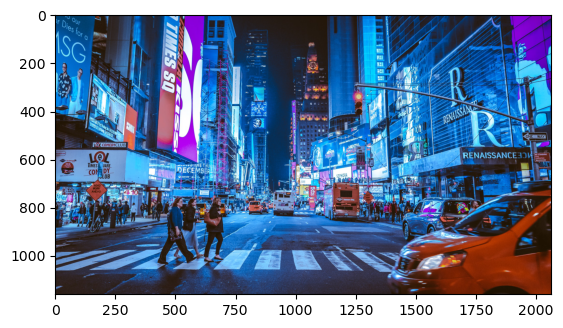

In [37]:
%matplotlib inline
# TODO: Load and review the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('C:\\Users\\user\\Documents\\Assignment\\images\\new_york.jpeg')
plt.imshow(image)
plt.show()

In [38]:
# TODO: Reshape the image for k-means clustering
w, h, d = tuple(image.shape)
image_reshape = image.reshape(w * h, d)
print("image: {}".format(image.shape))
print("image reshape: {}".format(image_reshape.shape))

image: (1161, 2064, 3)
image reshape: (2396304, 3)


In [39]:
# TODO: Run k-means clustering on reshaped image
from sklearn.cluster import KMeans

modele_km=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,n_init=10,n_clusters=4, random_state=0, tol=0.0001, verbose=0)
modele_km.fit(image_reshape)

KMeans(n_clusters=4, random_state=0)

In [41]:
# TODO: Print cluster centers and construct compressed image
palette = modele_km.cluster_centers_.astype(float)
compressed_image = palette[modele_km.labels_]
print(palette)
print("compressed image: {}".format(compressed_image.shape))

[[ 39.01661368  64.00757216 129.56141503]
 [ 27.68560064 127.45645232 210.03828935]
 [ 59.58789964  37.35295365  36.59671772]
 [147.32139444 190.60966142 230.72780984]]
compressed image: (2396304, 3)


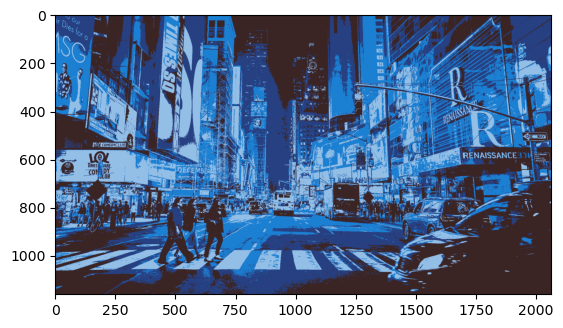

In [42]:
# TODO: Show the compressed image
height, width, channels = image.shape
compressed_image = compressed_image.reshape(height, width, channels)
plt.imshow(compressed_image/255.)
plt.show()